In [9]:
# preamble - import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import namedtuple

# Set the Seaborn style to minimal
sns.set_theme(style="darkgrid")

# Time series analysis

My name is Alin and I am the GTA for Alex Gibberd's MATH338/MATH458 course in the 2024 Winter/Lent term. I'm going to keep a running "blog" on this page for the course and add any cool material or examples that I think are relevant or useful. *Please note that **NONE** of the material on this page is examinable*.

The big focus here will be on the computing aspect of the course. The code snippets shown here are obviously Python but the R equivalent commands are easy to find/Google (yes, you can use GPT for this - it is probably one of the better uses for it actually).

## Week 1

With the workshop being before the lecture this week, the focus was on refreshing our memory on some basics of regressions but specific to time-index or varying data. In this post, we're going to explore data simulation and the thinking behind simulating from a model.

As statisticians, our jobs are often to model a *given* (already recorded/measured) data set. However, it is good practice to check if how well our model mimics the real data and we do that by simulating from the model itself. Take this week's first question where the the proposed model is

$$x_t = at + e_t $$
$$ e_t \sim_{iid} N(0, \sigma^2_e)$$

Looking at this equation we see that each measured quantity (i.e. data point) at time stamp $t$ is a function of a constant $a$ multiplied by the time stamp $t$ plus some error term. How would we go about simulating this process? We are used to thinking about how a specific model fits to some data but here we have to flip that thinking. We need to think about how the data would look like if we knew the model was *correct*. As such, this assumes that we know 2 things:
1. Model parameters -  the coefficient $a$ and the standard deviation of the error term $\sigma_e$
2. Dependent variable - the $t$'s for this case and more generally, any variable that we have control over.
Let's fix those quantities.

In [16]:
# fixed variables
n = 100
a = 0.1
sigma = 1.

t = np.linspace(start = 1., stop= 100., num = n)

# error terms - simulate these with a fixed seed for reproduceability
np.random.seed(338458)
errors = np.random.normal(loc = 0., scale = sigma, size = n)

Now that we have the fixed variables in memory, we can think about how these combine in order to generate out simulated observations $x_t$. Think about how the information flows *up* through the model (really this just alludes to doing the math which creates the observations)

In [8]:
X_t = a*t + errors

Let's plot our points to see how they look...

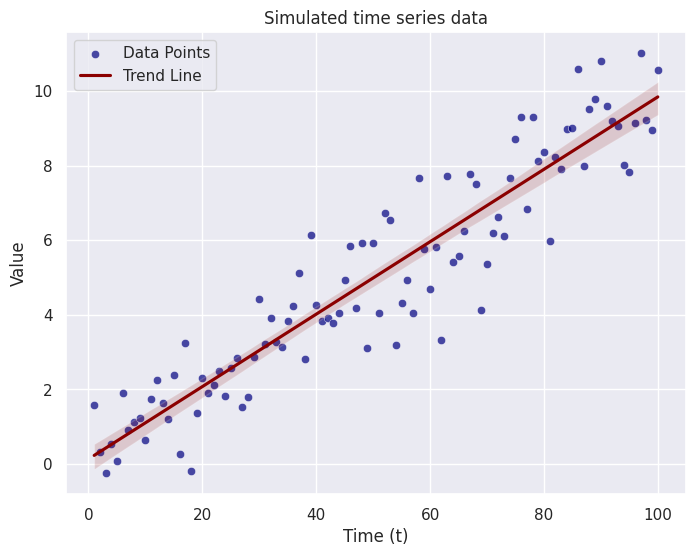

In [12]:
# Create a scatter plot with trend line
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=t, y=X_t, color='navy', alpha=0.7, label='Data Points')

# Trend line
sns.regplot(x=t, y=X_t, color='darkred', scatter=False, label='Trend Line')

# Set plot labels and title
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('Simulated time series data 1')

# Show legend
plt.legend()

# Show the plot
plt.show()

This is a very simple example where the time is a dependent variable. Often times this is not the case in real world examples. More often, you will get a time series where one variable depends on the previous one so we have to think recursively. Let's try modifying the code above to reflect that.

**_Problem_**: Simulate a data set of 100 points from the following model.
\begin{equation}
    x_t = a x_{t-1} + e_t
\end{equation}

We will follow the same format as before! The nice thing about good code is that it is easy to reuse (more on this later).

In [20]:
# fixed variables

a = 0.8
sigma = 1.

t = np.linspace(start = 1., stop= 100., num = 100)

# error terms - simulate these with a fixed seed for reproduceability
np.random.seed(338458)
errors = np.random.normal(loc = 0., scale = sigma, size = len(t))

In [21]:
# create a list to store our simulated data points
X_t2 = np.zeros(n)

# create the observations 1 by 1
for ii in range(1,n):
    X_t2[ii] = a * X_t2[ii-1] + errors[ii]

The dependency between each measurement means we needed a loop to access the previous value. Previously, we could rely on the vector operation to create the variable `X_t`. Let plot the data now.

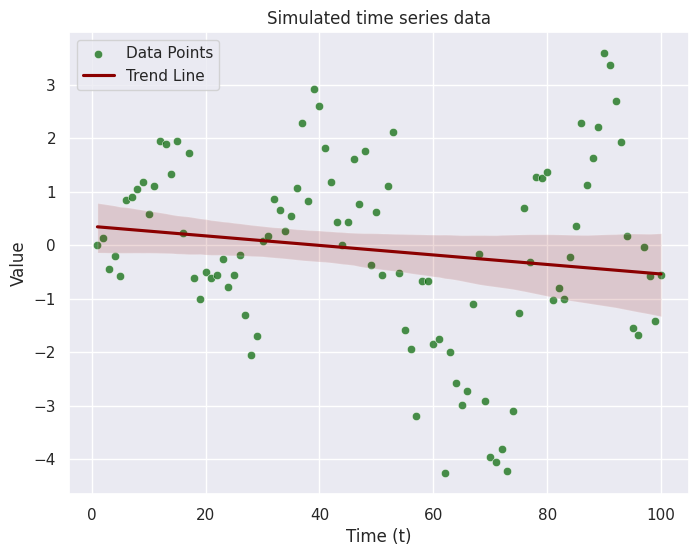

In [22]:
# Create a scatter plot with trend line
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(x=t, y=X_t2, color='darkgreen', alpha=0.7, label='Data Points')

# Trend line
sns.regplot(x=t, y=X_t2, color='darkred', scatter=False, label='Trend Line')

# Set plot labels and title
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.title('Simulated time series data')

# Show legend
plt.legend()

# Show the plot
plt.show()

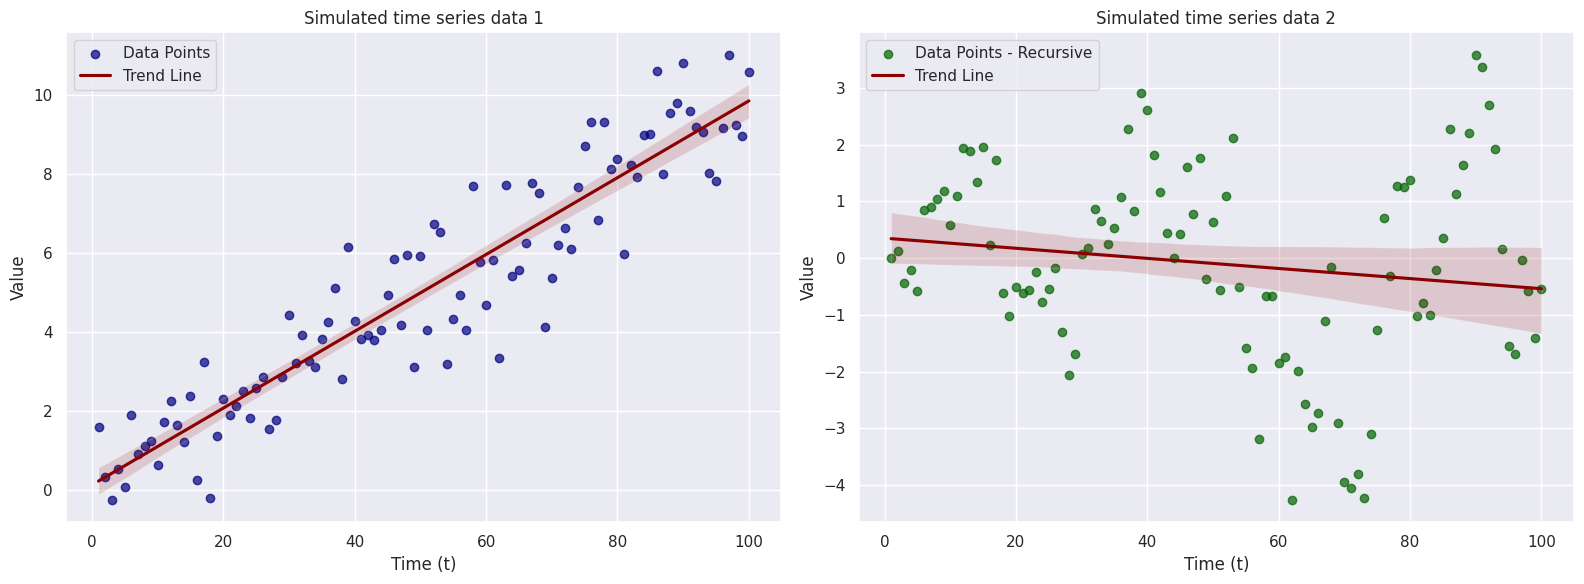

In [24]:
# Create a single figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (graph 1)
axs[0].scatter(t, X_t, color='navy', alpha=0.7, label='Data Points')
sns.regplot(x=t, y=X_t, color='darkred', scatter=False, ax=axs[0], label='Trend Line')
axs[0].set_xlabel('Time (t)')
axs[0].set_ylabel('Value')
axs[0].set_title('Simulated time series data 1')
axs[0].legend()

# Second subplot (graph 2)
axs[1].scatter(t, X_t2, color='darkgreen', alpha=0.7, label='Data Points - Recursive')
sns.regplot(x=t, y=X_t2, color='darkred', scatter=False, ax=axs[1], label='Trend Line')
axs[1].set_xlabel('Time (t)')
axs[1].set_ylabel('Value')
axs[1].set_title('Simulated time series data 2')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

There are many types of time series models that you will see throughout this course. I encourage you to play around with them and try to simulate data from each model to get a better understanding of how they models work (eg. how does changing the value of the parameter impact the resulting data -- play around with this and investigate it). That's all for this week... enjoy!

# Week 2

Coming soon...